## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Importing Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib nbagg
%matplotlib inline
from sklearn.preprocessing import LabelEncoder



In [2]:
df= pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.shape

(21597, 21)

In [7]:
duplicates = df[df.duplicated()]
print(len(duplicates))

0


Data has no duplicates

In [8]:
#Checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Data has missing values in columns waterfront, view and yr renovated.We have to deal with these columns given our model will not run with null values.

In [9]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
df['waterfront'] = df['waterfront'].fillna('NO')

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [13]:
df['view'].unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [14]:
 df['view'].fillna('NONE',inplace=True)

In [15]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [17]:
 df['yr_renovated'].fillna(0.0,inplace=True)

In [18]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [20]:
# Assuming 'your_dataframe' is the name of your DataFrame and 'your_column' is the column you want to convert
df['waterfront'] = df['waterfront'].map({'NO': 0, 'YES': 1})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**Converting the waterfront column into an interger**

In [22]:
# Assuming 'df' is the name of your DataFrame and 'waterfront' is the column you want to convert
le = LabelEncoder()
df['waterfront'] = le.fit_transform(df['waterfront'])

# Display the value counts after the transformation
print(df['waterfront'].value_counts())

0    21451
1      146
Name: waterfront, dtype: int64


In [23]:
df.info() #Checking whether the waterfront column has been converted into integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [24]:
print(df['view'].unique())
print(df['condition'].unique())
print(df['grade'].unique())
print(df['sqft_basement'].unique())

['NONE' 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660.0'
 '1220.0' '90

**Converting the object columns into integeres**

In [25]:
df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)
df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)
df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

In [26]:
df['sqft_basement'] = df['sqft_basement'].map(lambda x : float(x.replace('?', '0')))

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df.info() #Checking whether the object column has been converted into integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [29]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [30]:
df['renovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df = df.drop('yr_renovated', axis = 1) 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  zipcode        2159

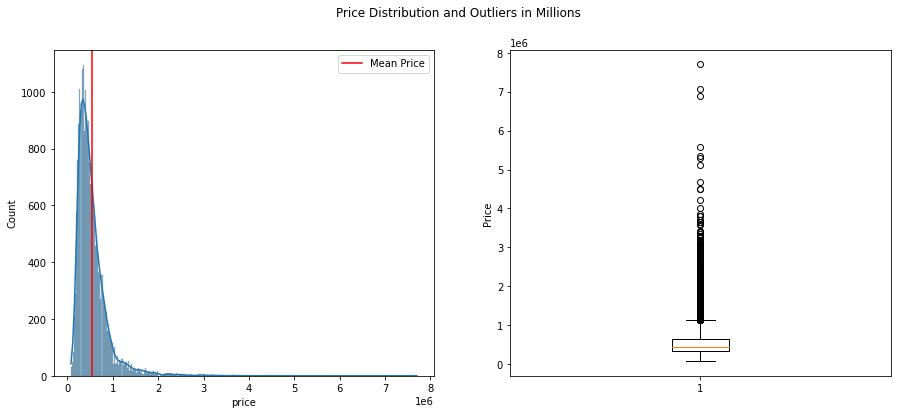

In [32]:
# Creating a figure space and visualizing
fig, ax = plt.subplots(figsize=(15,6), ncols=2)

# Histogram
sns.histplot(df.price, kde=True, ax=ax[0])
ax[0].axvline(df['price'].mean(), color='red', label="Mean Price")

# Boxplot
ax[1].boxplot(df['price'])
ax[1].set_ylabel("Price")
ax[0].legend()

# Title and showing
fig.suptitle("Price Distribution and Outliers in Millions")
plt.show()


The visual data analysis indicates that the predominant range of property prices falls between 0 and 1.2 million, with values exceeding this threshold deemed outliers. However, for the purposes of our analysis, all price points up to 5 million are deemed relevant and will be retained. Prices above the 5 million mark are categorized as genuine outliers and will be excluded from our dataset to maintain the integrity of our analysis.

In [33]:
# Checking the shape before the change
print(f'Before dropping outliers: {df.shape}')
#Dropping the outliers
df = df.loc[df['price'] < 5_000_000]
# Confirming the changes done
print(f'After dropping outliers: {df.shape}')

Before dropping outliers: (21597, 21)
After dropping outliers: (21590, 21)


In [34]:
#Dropping the id and date columns 
def drop_columns(df, to_drop, axis):
    return df.drop(columns=to_drop, axis =axis, inplace=True)

to_drop = ['id', 'date']
drop_columns(df,to_drop, axis=1)

# Display the resulting DataFrame
df.shape

(21590, 19)

**Modelling**

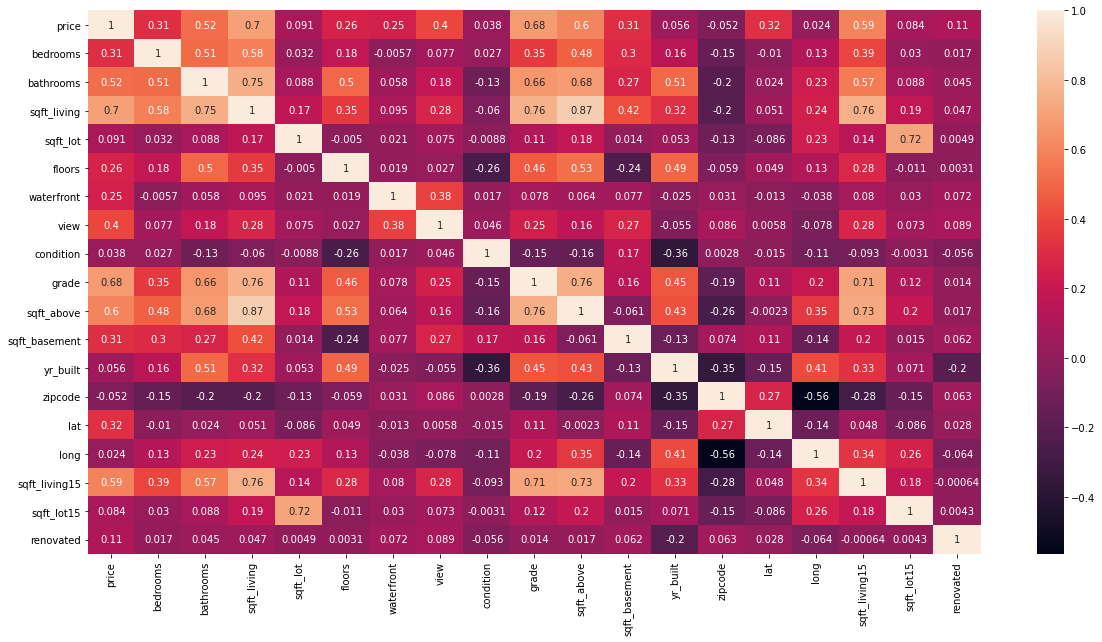

In [35]:
#Correlation Matrix
df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), annot=True);

In [36]:
# Getting descriptive statistics on our dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.159000e+04,21590.000000,21590.000000,21590.000000,2.159000e+04,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000,21590.000000
mean,5.384810e+05,3.372534,2.114555,2078.005141,1.509385e+04,1.493909,0.006623,0.232469,3.409866,7.656415,1786.906253,285.088513,1970.997175,98077.965030,47.560071,-122.213975,1985.952710,12754.338490,0.034368
std,3.528866e+05,0.925666,0.765532,908.799999,4.141800e+04,0.539661,0.081116,0.763176,0.650596,1.170358,822.209403,438.263346,29.372814,53.513951,0.138568,0.140744,684.294679,27277.481117,0.182176
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471025,-122.328000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.067350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,0.000000
max,4.670000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [37]:
#Checking for Multicollinearity between the variables
corr_df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

In [38]:
# Veiwing the highly correlated predictor pairs
corr_df[(corr_df.cc > 0.75) & (corr_df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874804
"(sqft_living, sqft_above)",0.874804
"(sqft_living, grade)",0.762512
"(grade, sqft_living)",0.762512
"(sqft_living15, sqft_living)",0.757803
"(sqft_living, sqft_living15)",0.757803
"(grade, sqft_above)",0.755045
"(sqft_above, grade)",0.755045
"(bathrooms, sqft_living)",0.753616


•	From the observations made above we see that there is a very high correlation between the predictor columns of 'sqft_above', 'sqft_living', 'sqft_living15, 'grade',and 'bathrooms'. Dropping some of these will eliminate multicollinearity features.

•	The columns to drop will be 'sqft_above', 'sqft_living15', 'grade',and 'bathrooms


In [39]:
#Dropping the highly correlated columns
highly_corr_fet =['sqft_above', 'sqft_living15','bathrooms','grade']
drop_columns(df,highly_corr_fet, axis=1)


In [41]:
# Viewing the the remaining dataset
print(df.shape)
df.head()

(21590, 15)


,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15,renovated
0,221900.0,3,1180,5650,1.0,0,0,3,0.0,1955,98178,47.5112,-122.257,5650,0
1,538000.0,3,2570,7242,2.0,0,0,3,400.0,1951,98125,47.7210,-122.319,7639,1
2,180000.0,2,770,10000,1.0,0,0,3,0.0,1933,98028,47.7379,-122.233,8062,0
3,604000.0,4,1960,5000,1.0,0,0,5,910.0,1965,98136,47.5208,-122.393,5000,0
4,510000.0,3,1680,8080,1.0,0,0,3,0.0,1987,98074,47.6168,-122.045,7503,0


 **Modeling**

**Fitting our Baseline Model**

In [49]:
#Checking for the highly correlated variable
correlation_with_price = df.corr()['price']
print(correlation_with_price)

price            1.000000
bedrooms         0.310147
sqft_living      0.696616
sqft_lot         0.091471
floors           0.261744
waterfront       0.252823
view             0.395390
condition        0.038382
sqft_basement    0.312364
yr_built         0.055705
zipcode         -0.051943
lat              0.316759
long             0.023913
sqft_lot15       0.084016
renovated        0.113661
Name: price, dtype: float64


In [51]:
#Determining the baseline variables
y = df['price']
X_baseline = df[['sqft_living']]

In [53]:
#Defining the model function
X = sm.add_constant(X_baseline)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                 2.035e+04
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:23:55   Log-Likelihood:            -2.9925e+05
No. Observations:               21590   AIC:                         5.985e+05
Df Residuals:                   21588   BIC:                         5.985e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.361e+04   4300.301     -5.490      

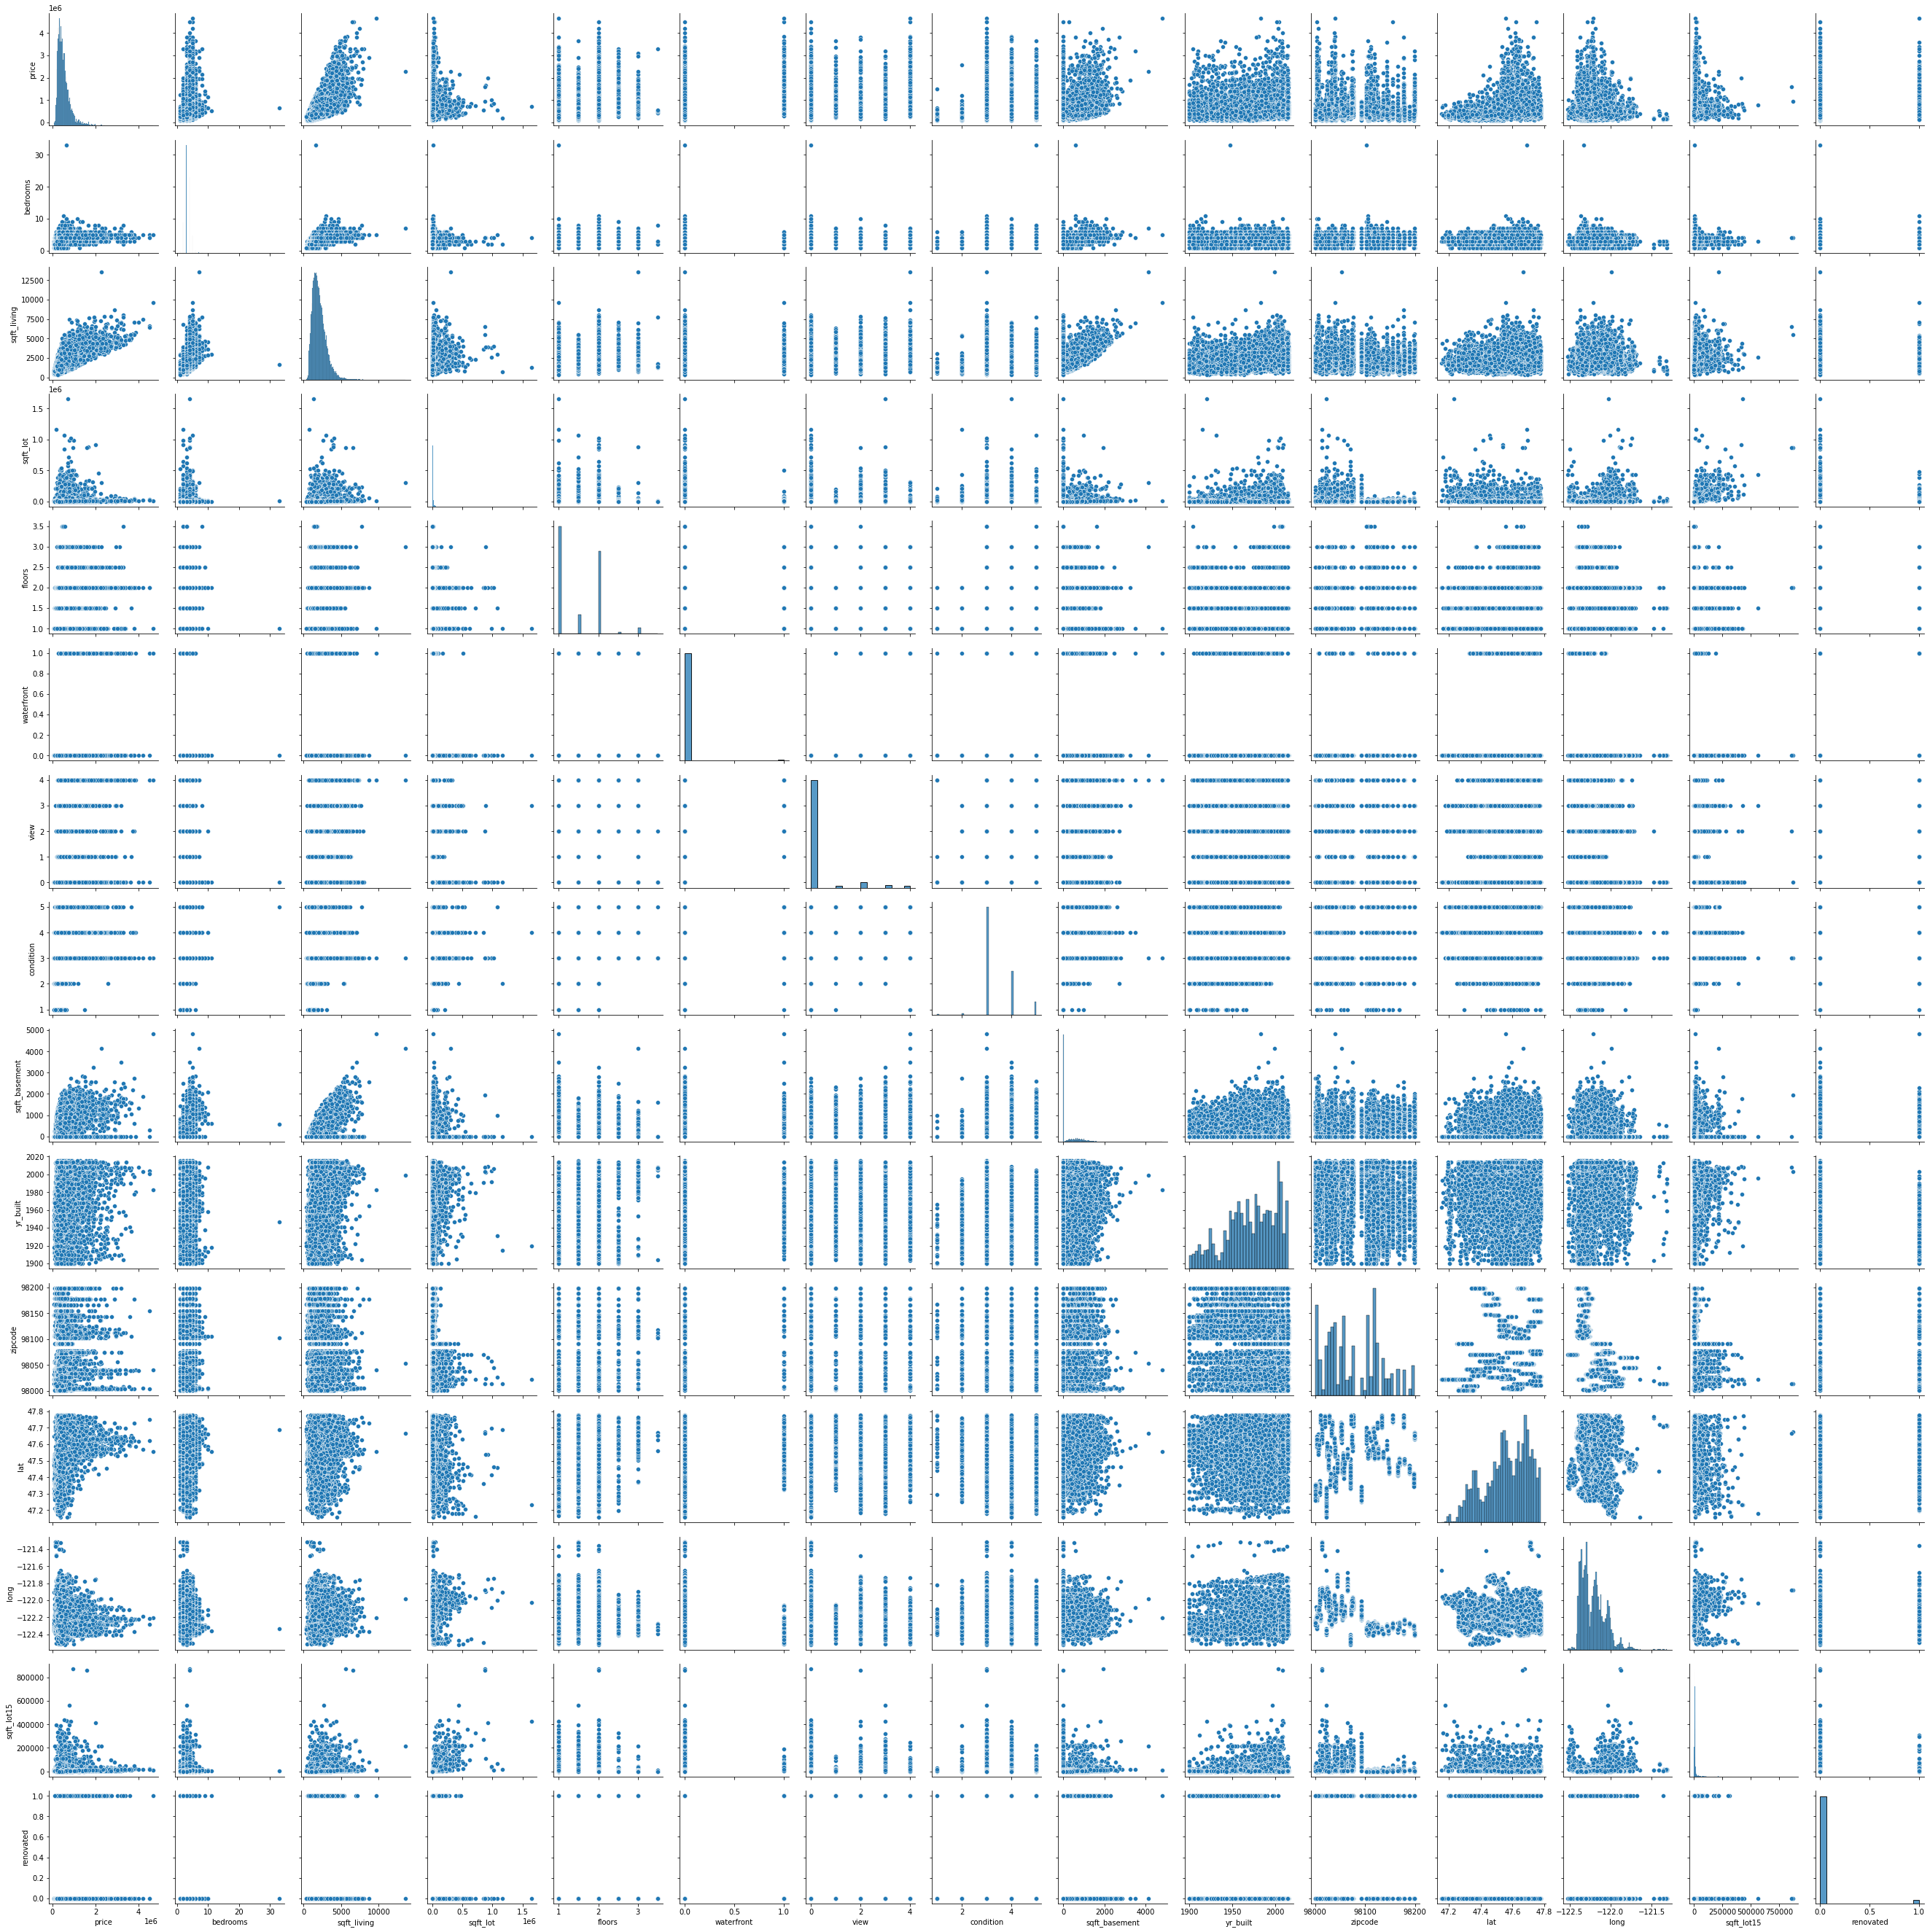

In [59]:
sns.pairplot(df)

The reported p_value is 0.00. This indicates that the overall regression model is statistically significant; however, as mentioned earlier, this is a rounded number, and the actual p-value is a very small number greater than zero but too small to be displayed with the chosen number of decimal places in the output.

The models explains about 48.5% of the variance in price

For every unit change in the sqft_living there is an increase in 270.4955 dollars in the price of houses

In [54]:
df['waterfront'] = df['waterfront'].astype(int)
X = df[["waterfront"]] 
y = df["price"]  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
plt.figure(figsize=(12, 6))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1474.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):          4.85e-312
Time:                        20:48:15   Log-Likelihood:            -3.0571e+05
No. Observations:               21590   AIC:                         6.114e+05
Df Residuals:                   21588   BIC:                         6.114e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.312e+05   2331.409    227.843      0.0

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

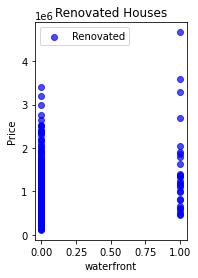

In [56]:
plt.subplot(121)
plt.scatter(df["waterfront"][df["renovated"] == 1], df["price"][df["renovated"] == 1], alpha=0.7, c="blue", label="Renovated")
plt.xlabel("waterfront")
plt.ylabel("Price")
plt.title("Renovated Houses")
plt.legend()

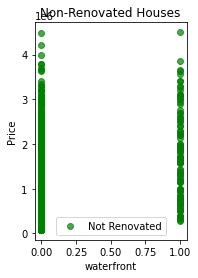

In [57]:
plt.subplot(122)
plt.scatter(df["waterfront"][df["renovated"] == 0], df["price"][df["renovated"] == 0], alpha=0.7, c="green", label="Not Renovated")
plt.xlabel("waterfront")
plt.ylabel("Price")
plt.title("Non-Renovated Houses")
plt.legend()

In [61]:
#Determining the multiple variables
y = df['price']
X_multiple = df[['sqft_living','bedrooms','waterfront','renovated','sqft_lot','floors','condition','condition','view','sqft_basement','yr_built','sqft_lot15','renovated','zipcode']]
X_multiple = pd.get_dummies(X_multiple, columns=['waterfront', 'renovated'], drop_first=True)
X_multiple

,sqft_living,bedrooms,sqft_lot,floors,condition,condition,view,sqft_basement,yr_built,sqft_lot15,zipcode,waterfront_1,renovated_1,renovated_1
0,1180,3,5650,1.0,3,3,0,0.0,1955,5650,98178,0,0,0
1,2570,3,7242,2.0,3,3,0,400.0,1951,7639,98125,0,1,1
2,770,2,10000,1.0,3,3,0,0.0,1933,8062,98028,0,0,0
3,1960,4,5000,1.0,5,5,0,910.0,1965,5000,98136,0,0,0
4,1680,3,8080,1.0,3,3,0,0.0,1987,7503,98074,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,3,1131,3.0,3,3,0,0.0,2009,1509,98103,0,0,0
21593,2310,4,5813,2.0,3,3,0,0.0,2014,7200,98146,0,0,0
21594,1020,2,1350,2.0,3,3,0,0.0,2009,2007,98144,0,0,0
21595,1600,3,2388,2.0,3,3,0,0.0,2004,1287,98027,0,0,0


In [62]:
#Defining the model function
X = sm.add_constant(X_multiple)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     2570.
Date:                Fri, 22 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:16:11   Log-Likelihood:            -2.9684e+05
No. Observations:               21590   AIC:                         5.937e+05
Df Residuals:                   21577   BIC:                         5.938e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.806e+06   3.23e+06      1.489